# **Ejercicio 1**
Entrene un regresor usando el modelo de `KNN` para predecir el precio de un carro dependiendo de su kilometraje recorrido

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [2]:
carros = pd.read_csv('carros.csv')

In [3]:
carros.head()

,kms,precio
0,6048,1385956
1,11825,1297582
2,20000,1000000
3,21048,1284844
4,21549,685300


Veamos cómo están distribuidos los datos

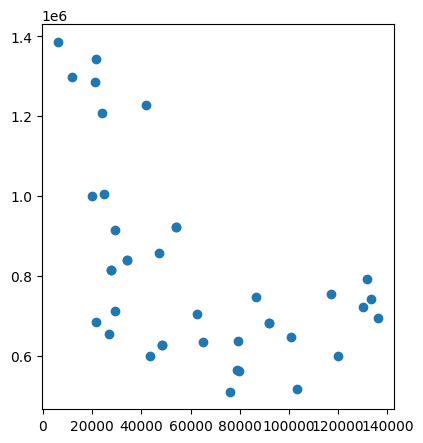

In [4]:
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(carros['kms'],carros['precio'])

Por la forma en que están distribuidos los datos vemos que una regresión lineal podría no funcionar muy bien, mejoremos esta gráfica y demos algo de formato

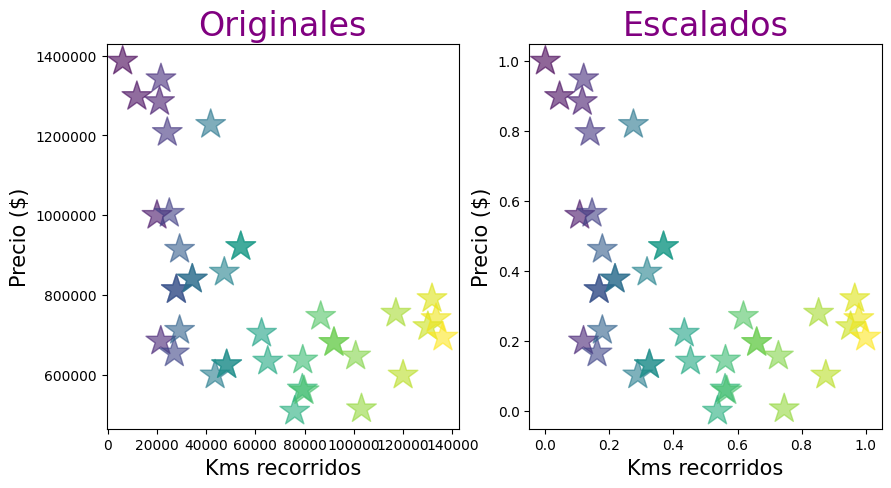

In [5]:
fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1, 2, 1)

ax.scatter(carros["kms"], carros["precio"], marker="*",
           s=500, c=range(carros["kms"].size), alpha=0.6)

ax.set_title("Originales", size=24, color="purple")
ax.set_ylabel("Precio ($)", size=15)
ax.set_xlabel("Kms recorridos", size=15)
ax.ticklabel_format(style="plain")


# Escalamiento de los datos
escala_kms = MinMaxScaler()
escala_precio = MinMaxScaler()
kms = escala_kms.fit_transform(carros["kms"].values.reshape(-1, 1))
precio = escala_precio.fit_transform(carros["precio"].values.reshape(-1, 1))


# Graficar datos escalados: kms vs precio
ax = fig.add_subplot(1, 2, 2)

ax.scatter(kms, precio, marker="*",
           s=500, c=range(kms.size), alpha=0.6)

ax.set_title("Escalados", size=24, color="purple")
ax.set_ylabel("Precio ($)", size=15)
ax.set_xlabel("Kms recorridos", size=15)
ax.ticklabel_format(style="plain")

plt.show()

Debemos notar en el códico anterior que hemos usado dos escaladores, uno para `kms` y otro para `precio`. Aunque el escalador sea el mismo `MinMaxScaler` es muy importante que usemos uno para las features y otro para el target, de lo contrario tendremos resultados muy malos que no serán coherentes con lo que esperamos

# Creación del modelo KNN Regressor

In [6]:
modelo = KNeighborsRegressor(n_neighbors=3)
X = carros['kms'].values.reshape(-1,1)
Y = carros['precio'].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 20)
escala_kms = MinMaxScaler()
escala_precio = MinMaxScaler()
#scaler = MinMaxScaler()

x_train_f = escala_kms.fit_transform(x_train)
x_test_f = escala_kms.transform(x_test)

¿Qué pasaría si escalamos también los valores de `y_train` y `y_test`, es decir, entrenamos nuestro modelo con todos los datos estandarizados? ¿cómo podemos recuperar los valores originales? en ocasiones esto puede ocurrir y con la estandarización podemos recuperarlos con la transformación inversa. Veamos como sería esto

In [11]:
# Antes de escalar los datos debo recordar haber hecho el .reshape(-1,1)
y_train_f = escala_precio.fit_transform(y_train)
y_test_f = escala_precio.transform(y_test)

Ahora que ya tenemos nuestros datos escalados, podemos entonces entrenar nuestro modelo

In [18]:
modelo.fit(x_train_f,y_train_f)

KNeighborsRegressor(n_neighbors=3)

In [19]:
x_test_f

array([[0.11911385],
       [0.85323047],
       [0.96598174],
       [0.04439202],
       [0.17788314],
       [0.21740333],
       [0.53729176],
       [0.21740333]])

In [20]:
y_pred = modelo.predict(x_test_f)

In [21]:
y_pred

array([[0.79658648],
       [0.11110205],
       [0.23396936],
       [0.81342423],
       [0.38138578],
       [0.38138578],
       [0.08291618],
       [0.38138578]])

Como vemos los valores de `y_pred` están entre `0` y `1` dado que usamos `MinMaxScaler` pero nosotros deseamos ver los valores reales de y_pred y no los escalados, para recuperar estos valores hacemos lo siguiente

In [22]:
y_pred = escala_precio.inverse_transform(y_pred)
y_pred

array([[1208948.        ],
       [ 612447.66666667],
       [ 719365.33333333],
       [1223600.        ],
       [ 847645.33333333],
       [ 847645.33333333],
       [ 587920.66666667],
       [ 847645.33333333]])

Ahora necesitamos recuperar el arregro unidimensional para poder usarlo como columna de un dataframe, para esto usamos el método `.flatten()`

In [23]:
# Esto nos ayuda a reducir la dimensionalidad de los arreglos y ahora será unidimensional
Comparacion = pd.DataFrame({'x_test_f':x_test_f.flatten(),
                            'x_test':x_test.flatten(),
                            'prediccion':np.round(y_pred.flatten(),0).astype(int),
                            'y_test':y_test.flatten()})
Comparacion

,x_test_f,x_test,prediccion,y_test
0,0.119114,21549,1208948,685300
1,0.853230,117084,612448,755014
2,0.965982,131757,719365,791560
3,0.044392,11825,1223600,1297582
4,0.177883,29197,847645,712074
5,0.217403,34340,847645,840400
6,0.537292,75969,587921,509718
7,0.217403,34340,847645,840400


Y como vemos ahora nuestro regresor funciona correctamente, algunos valores están próximos a lo que se quería predecir. Intentemos ahora predecir usando un nuevo valor del kilometraje recorrido

In [24]:
kms_nuevo = escala_kms.transform([[20000]])
new_pred = modelo.predict(kms_nuevo)
escala_precio.inverse_transform(np.round(new_pred,2))

array([[1211918.4]])

Ahora podemos crear un conjunto de valores de kilometraje y utilizar el modelo para ver cómo se está comportando con los vecinos, esto lo hariamos de la siguiente manera

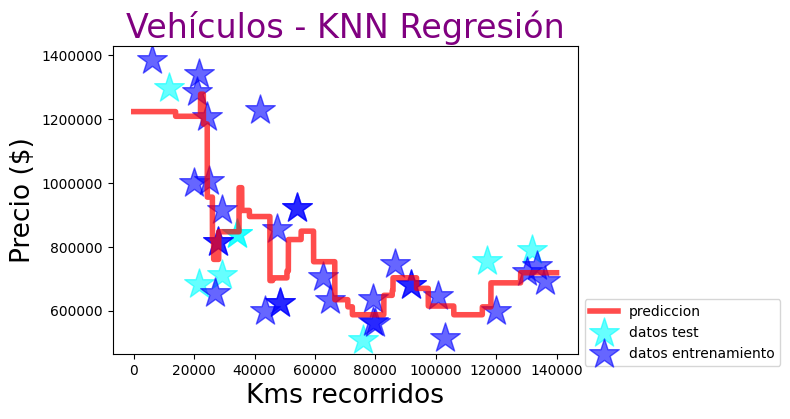

In [25]:
# Múltiples regresiones de los valores dentro del rango
X_new = escala_kms.transform(np.arange(140000).reshape(-1, 1))
Y_new = modelo.predict(X_new)
todas = escala_precio.inverse_transform(Y_new)
todas = todas.reshape(1, -1)

# Graficar los resultados de las múltiples regresiones
fig = plt.figure(figsize=(6, 4))

plt.plot(np.arange(140000), todas.reshape(1, -1)[0],
        linewidth=4,label = 'prediccion', color="red", alpha=0.7)

plt.scatter(x_test, y_test, marker="*",
            s=500, label = 'datos test', c = 'cyan', alpha=0.6)

plt.scatter(x_train, y_train, marker="*",
            s=500, label = 'datos entrenamiento', c = 'blue', alpha=0.6)


plt.title("Vehículos - KNN Regresión", size=24, color="purple")
plt.ylabel("Precio ($)", size=19)
plt.xlabel("Kms recorridos", size=19)
plt.legend(bbox_to_anchor=(1, 0.2))
plt.ticklabel_format(style="plain")
plt.show()